# Visualização de dados - casos confirmados e mortes por COVID-19 

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
sns.set(rc={'figure.figsize':(15, 8)})

In [3]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [4]:
global_deaths = pd.read_csv("time_series_covid19_deaths_global.csv", sep=",")
global_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7204,7204,7206,7206,7206,7212,7214,7220,7221,7221
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2685,2698,2705,2710,2713,2713,2725,2734,2746,2753
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5805,5812,5815,5819,5822,5826,5831,5838,5843,5846
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1537,1537,1567,1574,1577,1577,1587,1598,1603,1613


In [5]:
global_deaths["Country/Region"] = global_deaths["Country/Region"].replace({
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Central African Republic': 'Central African Rep.',
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'Dem. Rep. Congo',
    "Cote d'Ivoire": "Côte d'Ivoire",
    'Dominican Republic': 'Dominican Rep.',
    'Equatorial Guinea': 'Eq. Guinea',
    'Eswatini': 'eSwatini',
    'Holy See': 'Italy',
    'Korea, South': 'South Korea',
    'North Macedonia': 'Macedonia',
    'Solomon Islands': 'Solomon Is.',
    'South Sudan':  'S. Sudan',
    'Taiwan*': 'Taiwan',
    'US': 'United States of America',
    'West Bank and Gaza': 'Palestine'
    })

In [6]:
global_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv', sep=',')
global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023


In [7]:
global_confirmed["Country/Region"] = global_confirmed["Country/Region"].replace({
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Central African Republic': 'Central African Rep.',
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'Dem. Rep. Congo',
    "Cote d'Ivoire": "Côte d'Ivoire",
    'Dominican Republic': 'Dominican Rep.',
    'Equatorial Guinea': 'Eq. Guinea',
    'Eswatini': 'eSwatini',
    'Holy See': 'Italy',
    'Korea, South': 'South Korea',
    'North Macedonia': 'Macedonia',
    'Solomon Islands': 'Solomon Is.',
    'South Sudan':  'S. Sudan',
    'Taiwan*': 'Taiwan',
    'US': 'United States of America',
    'West Bank and Gaza': 'Palestine'
    })

In [21]:
top5dth = deaths_plotting.loc[:, ["Country/Region", "final_sum"]].sort_values("final_sum", ascending=False).drop_duplicates().head(5)
top5dth

,Country/Region,final_sum
18,United States of America,206701093
40,Brazil,145146763
117,India,99423548
38,Mexico,75753178
42,Peru,61109688


# Panorama global do COVID-19

Os mapas abaixo mostram a proporção de casos confirmados e mortes por COVID-19 por países. O cálculo considera a porcentagem de casos e de mortes de acordo com o tamanho da população do país.

A partir dos gráficos abaixo, é possível perceber que alguns países da América do Norte, da América do Sul e da Europa Ocidental se destacam na proporção dos casos e das mortes.

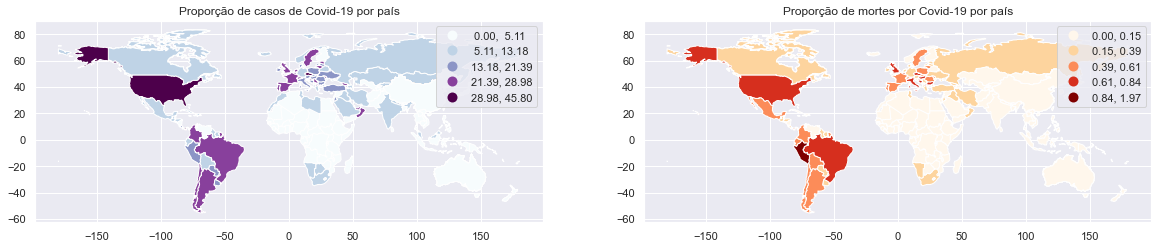

In [8]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

confirmed_plotting = world.merge(global_confirmed, left_on='name', right_on='Country/Region')
confirmed_plotting["partial_sum"] = confirmed_plotting.loc[:, "1/22/20":].sum(axis=1)
grouped_plotting = confirmed_plotting.groupby("Country/Region").agg(final_sum=("partial_sum", "sum")).reset_index()
confirmed_plotting = confirmed_plotting.merge(grouped_plotting, on='Country/Region')
confirmed_plotting["percentage"] =  confirmed_plotting["final_sum"] / confirmed_plotting["pop_est"]
axes[0].set_title("Proporção de casos de Covid-19 por país")
confirmed_plotting.plot(
                        column="percentage", cmap ='BuPu',   
                        scheme='natural_breaks', k=5, 
                        legend =True, ax=axes[0]
                        )

deaths_plotting = world.merge(global_deaths, left_on='name', right_on = 'Country/Region')
deaths_plotting["partial_sum"] = deaths_plotting.loc[:, "1/22/20":].sum(axis=1)
grouped_plotting = deaths_plotting.groupby("Country/Region").agg(final_sum=("partial_sum", "sum")).reset_index()
deaths_plotting = deaths_plotting.merge(grouped_plotting, on='Country/Region')
deaths_plotting["percentage_of_death"] =  deaths_plotting["final_sum"] / deaths_plotting["pop_est"]
axes[1].set_title("Proporção de mortes por Covid-19 por país")
deaths_plotting.plot(
                    column="percentage_of_death", cmap ='OrRd',   
                    scheme='natural_breaks', k=5, 
                    legend =True, ax=axes[1]
                    )

plt.show()

# Top 5 países em números de mortes por COVID-19

Os gráficos abaixo mostram a evolução do número de mortes por COVID-19 nos cinco países que obtiveram os maiores índices de mortes no mundo de 01/05/2020 a 08/10/2021: Estados Unidos, Brasil, Índia, México e Peru. O primeiro gráfico mostra a média móvel semanal do número de mortes nesses países. Já o segundo gráfico, é resultado de um cálculo da variação diária do número de mortes nos países selecionados.

Nos gráficos, percebemos que a evolução das mortes nos Estados Unidos e no México possuem comportamento semelhante, apesar dos números absolutos totais dos Estados Unidos serem maiores que os do México.

Quanto ao Brasil, país com segundo maior número absoluto de mortes, a curva de variação diária apresenta um comportamento mais gradual, mostrando que provavelmente o número de mortes continuou relativamente alto em todo o período analisado.

O Peru está apresentando um nível alto de variação diária do número de mortes desde maio de 2021, mas a partir de setembro o país entrou em uma tendência de decrescimento desse índice.

Por fim, assim como o Brasil, a Índia mostra um índice de variação diária do número de mortes relativamente mais gradual, mas o gráfico de média móvel semanal mostra que houve um pico de mortes entre maio e junho de 2021.

<AxesSubplot:title={'center':'Média móvel do número de mortes'}, xlabel='Data', ylabel='Média de mortes'>

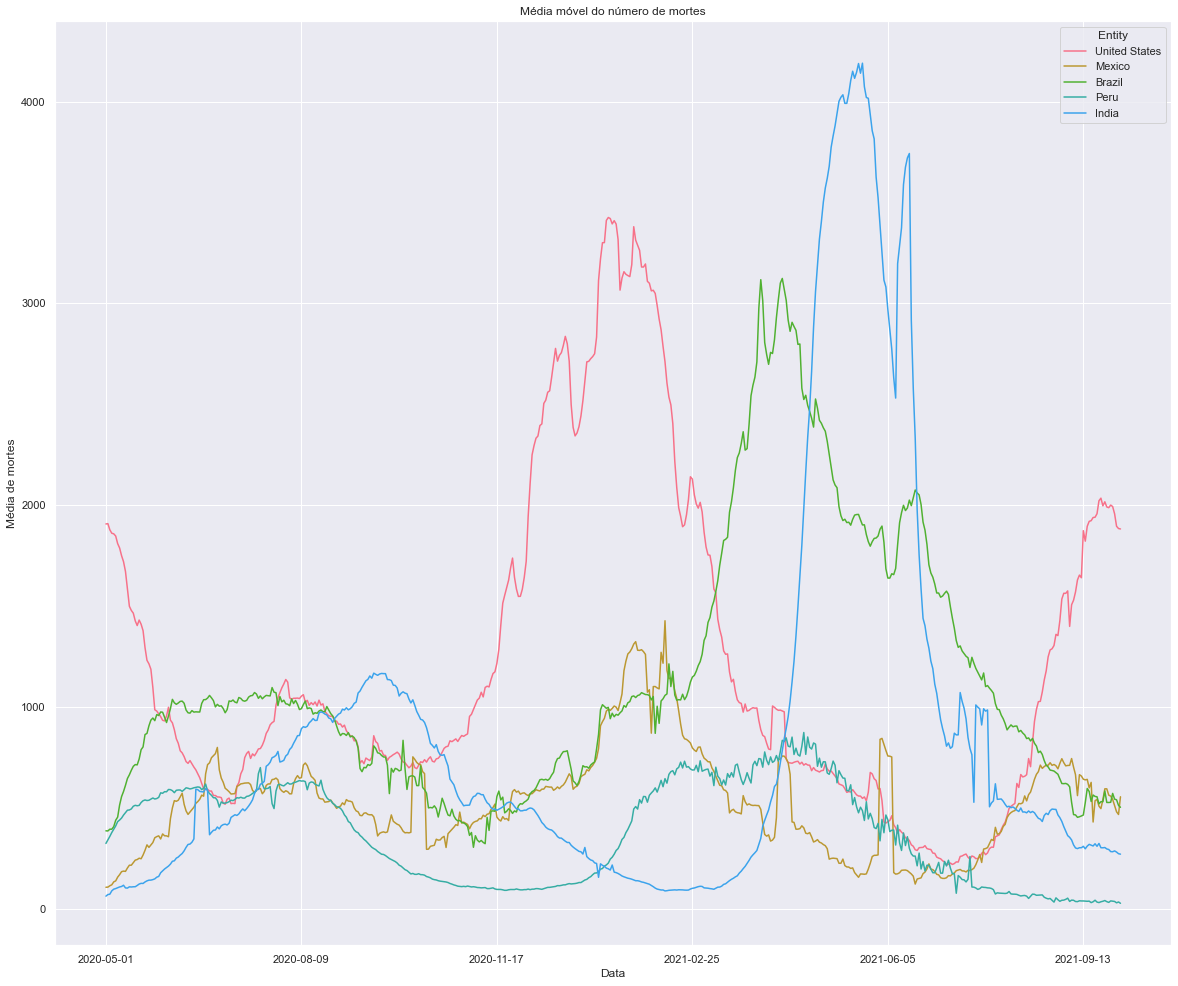

In [25]:
deaths = pd.read_csv('daily-covid-deaths-7-day.csv', sep=',')
deaths = deaths.rename(columns={"Daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned)": "deaths_avg"})
df = deaths.loc[:, ('Day', 'deaths_avg', 'Entity')]
df_grouped = df.groupby(["Day", "Entity"]).agg(sum_qtd=("deaths_avg", "sum")).reset_index()
df_pivot = df_grouped.pivot(index="Day", columns="Entity", values="sum_qtd").reset_index()
selected_df_pivot = df_pivot.loc[:, ('Day',
                                     'United States',
                                     'Mexico',
                                     'Brazil',
                                     'Peru',
                                     'India',
                                    )]

selected_df_pivot = selected_df_pivot[((selected_df_pivot['Day'] >= '2020-05-01') & (selected_df_pivot['Day'] <= '2021-10-08'))]

selected_df_pivot.plot(x="Day", xlabel="Data", ylabel="Média de mortes", title='Média móvel do número de mortes', color=sns.color_palette("husl"))

<AxesSubplot:title={'center':'Índice de variação diária do número de mortes'}, xlabel='Data', ylabel='Índice de variação diária'>

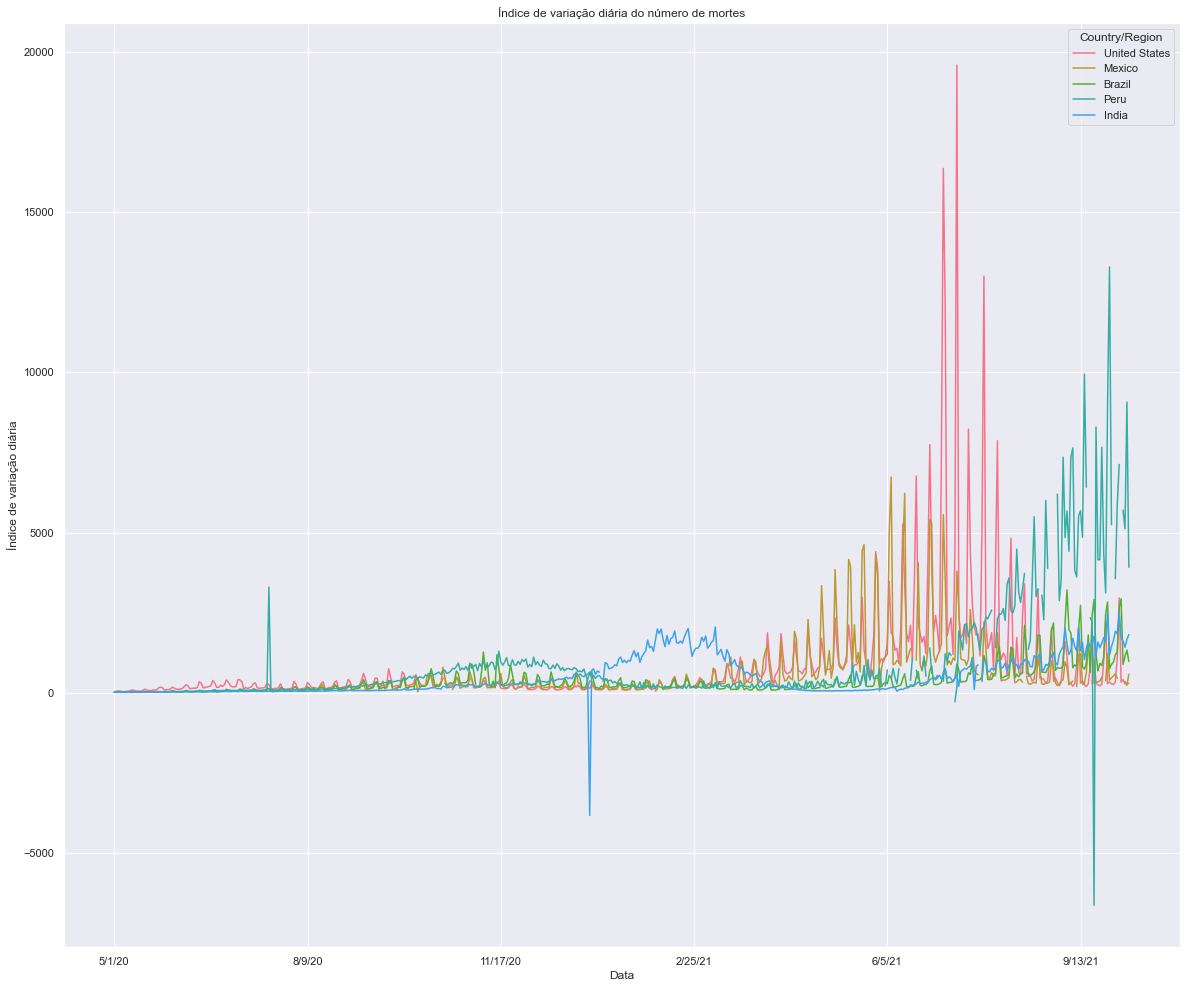

In [28]:
deaths_top5 = global_deaths[(
                    (global_deaths['Country/Region'] == 'United States of America') |
                    (global_deaths['Country/Region'] == 'Brazil') |
                    (global_deaths['Country/Region'] == 'India') |
                    (global_deaths['Country/Region'] == 'Mexico') |
                    (global_deaths['Country/Region'] == 'Peru')
                    )]
deaths_top5.index = deaths_top5['Country/Region']
deaths_top5 = deaths_top5.loc[:, '1/22/20':'10/8/21']
deaths_top5 = deaths_top5.T

deaths_top5['US-diff'] = deaths_top5['United States of America'].diff()
deaths_top5['MX-diff'] = deaths_top5['Mexico'].diff()
deaths_top5['BR-diff'] = deaths_top5['Brazil'].diff()
deaths_top5['PE-diff'] = deaths_top5['Peru'].diff()
deaths_top5['IN-diff'] = deaths_top5['India'].diff()

deaths_top5['US-growth'] = deaths_top5['United States of America'] / deaths_top5['US-diff'] 
deaths_top5['MX-growth'] = deaths_top5['Mexico'] / deaths_top5['MX-diff']
deaths_top5['BR-growth'] = deaths_top5['Brazil'] / deaths_top5['BR-diff']
deaths_top5['PE-growth'] = deaths_top5['Peru'] / deaths_top5['PE-diff']
deaths_top5['IN-growth'] = deaths_top5['India'] / deaths_top5['IN-diff']

deaths_top5_plot = deaths_top5.loc['5/1/20':, ('US-growth',
                                     'MX-growth',
                                     'BR-growth',
                                     'PE-growth',
                                     'IN-growth',
                                    )]
deaths_top5_plot = deaths_top5_plot.rename(columns={'US-growth': 'United States',
                                'MX-growth': 'Mexico',
                                'BR-growth': 'Brazil',
                                'PE-growth': 'Peru',
                                'IN-growth': 'India'})

deaths_top5_plot.plot(ylabel="Índice de variação diária", xlabel="Data", 
                      legend=True, color=sns.color_palette("husl"), title='Índice de variação diária do número de mortes')